library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


 Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving study_performance.csv to study_performance.csv


Load Data

In [ ]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


Visualize Missing Value

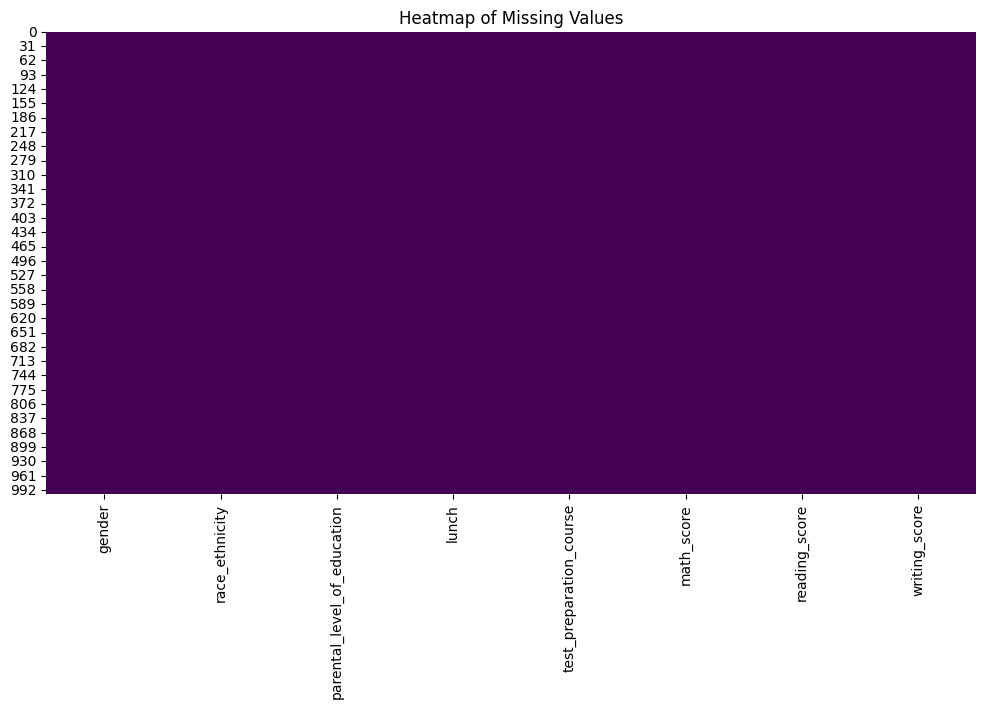

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Print the percentage of missing values in each column

In [ ]:
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)


Percentage of missing values in each column:
 gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64


Remove 'race_ethnicity' feature

In [ ]:
data = data.drop(columns=['race_ethnicity'])

Encode Categorical Variables

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

Split Data into Features (X) and Target (y)

In [ ]:
X = data_encoded.drop('math_score', axis=1)
y = data_encoded['math_score']

Split Data into Training, Validation, and Testing Sets

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

Train Linear Regression Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_val_predictions = lr_model.predict(X_val)

Evaluate Linear Regression Model on Validation Set

In [ ]:
lr_r2 = r2_score(y_val, lr_val_predictions)
lr_r2_percentage = lr_r2 * 100
lr_mae = mean_absolute_error(y_val, lr_val_predictions)

print(f"Linear Regression Validation Set - R² Score: {lr_r2_percentage:.2f}%")
print(f"Linear Regression Validation Set - Mean Absolute Error: {lr_mae:.2f}")

Linear Regression Validation Set - R² Score: 88.15%
Linear Regression Validation Set - Mean Absolute Error: 4.59


Test Linear Regression Model on Test Set

In [ ]:
lr_test_predictions = lr_model.predict(X_test)
lr_test_r2 = r2_score(y_test, lr_test_predictions)
lr_test_mae = mean_absolute_error(y_test, lr_test_predictions)

print(f"Linear Regression Test Set - R² Score: {lr_test_r2:.2f}%")
print(f"Linear Regression Test Set - Mean Absolute Error: {lr_test_mae:.2f}")

Linear Regression Test Set - R² Score: 0.84%
Linear Regression Test Set - Mean Absolute Error: 4.39


Visualize the Results for Linear Regression

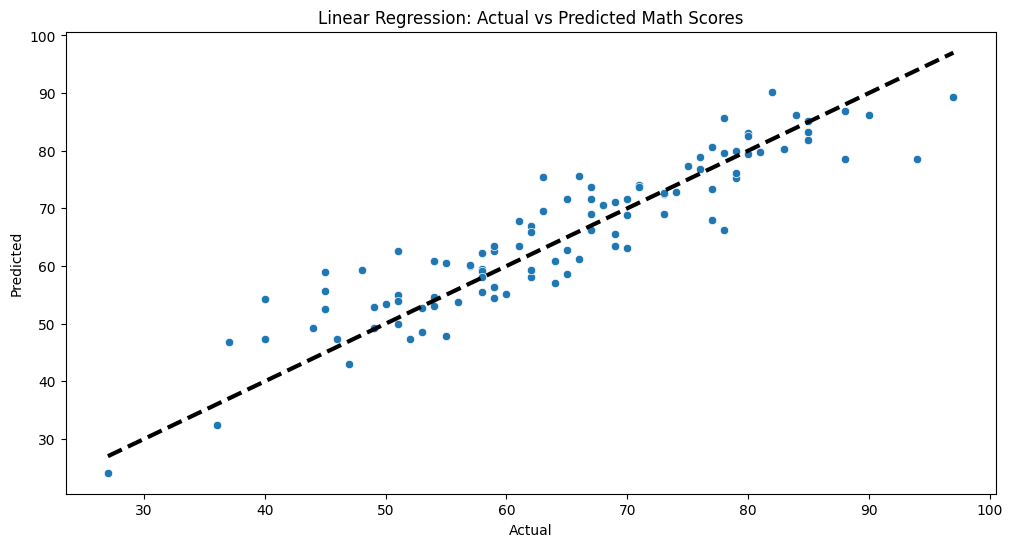

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=lr_test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted Math Scores')
plt.show()

Residual analysis for Linear Regression

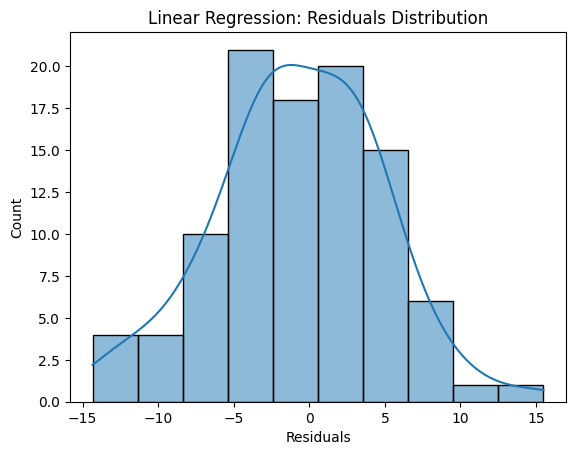

In [ ]:
residuals_lr = y_test - lr_test_predictions
sns.histplot(residuals_lr, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression: Residuals Distribution')
plt.show()

deployment

In [ ]:
# Install Flask
!pip install flask
!pip install joblib

# Import necessary libraries
import pandas as pd
from flask import Flask, request, jsonify
import joblib

# Load the trained model
lr_model = joblib.load('linear_regression_model.pkl')

# Create a Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    df = pd.DataFrame(data)

    # Predict using the Linear Regression model
    predictions = lr_model.predict(df)
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(port=5000)